In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
job=pd.read_excel(r"C:\Users\User\Desktop\Study Guide\ML Projects\Supervised Learning\Classification\Naive Bayes\Job_Suspension_Naive_Bayes\Naive bayes.xlsx")

In [4]:
job.head()

,Job Id,Sched Date,Job Status,Account Number,Customer Name,Address 1,Address 2,City,Olt,Area,...,Suspension type,Comments,Time On Site,Time Off Site,Duration,Stb,Team Manager,Tech1,Tech2,Sda
0,1540898,2024-04-28,Suspended,242000080007,JAMILA MITCHELL,"10421353, WALLACE ST BLDG:SDU::10421353",LAVENTILLE,LAVENTILLE,NaN,Trinidad,...,DI,"Job created by Love Saint Louis M.C Flawen, Cu...",NaN,NaN,NaN,0,Burke Jowayne,Claeron Austin,NaN,18683500147
1,1540896,2024-04-28,Suspended,242000228100,ANTHONY WODROFFE,"10418727, SOHON TR BLDG:SDU::10418727",LAVENTILLE Trinidad and Tobago,LAVENTILLE,NaN,Trinidad,...,DI,Job created by Farquharson Javaun,NaN,NaN,NaN,0,Burke Jowayne,Claeron Austin,NaN,18687580680
2,1540861,2024-04-28,Suspended,242000235814,YASEEN ALLSOP,"10162809, 10162809 BLDG:SDU::10162809",MORVANT Trinidad and Tobago,MORVANT,NaN,Trinidad,...,DI,"Job created by Gray Gabrielle , Cx is offline ...",NaN,NaN,NaN,0,Nedd Carie,Nicholas Young,NaN,18683532645
3,1540626,2024-04-26,Suspended,242000284920,Interamerican Institute for Corporation and Ag...,"6267228, 6267228",BLDG:SDU::6267228,ST. JOSEPH,NaN,Trinidad,...,DI,"Job created by USER ADMIN, due to time constra...",NaN,NaN,NaN,0,Reyes Edward,Amilcar Franklin,NaN,0
4,1540563,2024-04-27,Suspended,242000149348,TRICIA DARCEUIL-WILSON,"4317129, COVIGNE ROAD BLDG:MDU::4317129",DIEGO MARTIN,DIEGO MARTIN,NaN,Trinidad,...,DI,"Job created by Haynes Elika , No internet, LOS...",NaN,2024-04-27 16:33:23,NaN,0,Mitchell Dwayne TM,Kern Hughes,NaN,18683409092


In [6]:
list(job.columns)

['Job Id',
 'Sched Date',
 'Job Status',
 'Account Number',
 'Customer Name',
 'Address 1',
 'Address 2',
 'City',
 'Olt',
 'Area',
 'Eta',
 'Address On Wo',
 'Job Type',
 'Job Details',
 'Package Type',
 'Fat Name',
 'Reason For Suspend',
 'Suspension type',
 'Comments',
 'Time On Site',
 'Time Off Site',
 'Duration',
 'Stb',
 'Team Manager',
 'Tech1',
 'Tech2',
 'Sda']

In [9]:
job = job.drop(columns = ["Job Id","Sched Date",'Job Status','Account Number','Customer Name','Address 1','Address 2','City','Olt',
 'Area','Eta','Address On Wo','Job Type','Job Details','Package Type','Fat Name','Reason For Suspend','Time On Site','Time Off Site','Duration','Stb','Team Manager',
 'Tech1','Tech2','Sda'])

In [11]:
job.sample(10)

,Suspension type,Comments
1504,CU,"Job created by USER ADMIN, customer contacted ..."
3193,DI,"Job created by USER ADMIN, Call Ahead Confirm..."
3740,DI,"Job created by USER ADMIN, ETA FAILED - AE02DJ..."
2786,DI,"Job created by USER ADMIN, Call ahead confirme..."
795,DI,"Job created by Archie La Donna, please assist ..."
2425,DI,"Job created by Clarke Davian, Info Checked - A..."
902,DI,"Job created by USER ADMIN, 18683809676- confir..."
903,DI,"Job created by USER ADMIN, SIMEON ROAD, 186878..."
1516,DI,"Job created by USER ADMIN, Call Ahead Confirme..."
3547,CU,"Job created by USER ADMIN, Call Ahead Confirme..."


In [19]:
job["Comments"].astype('string')

0       Job created by Love Saint Louis M.C Flawen, Cu...
1                      Job created by Farquharson Javaun 
2       Job created by Gray Gabrielle , Cx is offline ...
3       Job created by USER ADMIN, due to time constra...
4       Job created by Haynes Elika , No internet, LOS...
                              ...                        
4278    Job created by Sobers Anesia, Customer said th...
4279                          Job created by Worrell Kyle
4280    Job created by USER ADMIN, 10.6373940000-61.33...
4281    Job created by Caton Keisha, this no.186835111...
4282    Job created by USER ADMIN, ETA CONFIRMED - AE0...
Name: Comments, Length: 4283, dtype: string

In [24]:
#strip numbers from text
job.replace(r'\d+', '', regex=True)

,Suspension type,Comments
0,DI,"Job created by Love Saint Louis M.C Flawen, Cu..."
1,DI,Job created by Farquharson Javaun
2,DI,"Job created by Gray Gabrielle , Cx is offline ..."
3,DI,"Job created by USER ADMIN, due to time constra..."
4,DI,"Job created by Haynes Elika , No internet, LOS..."
...,...,...
4278,DI,"Job created by Sobers Anesia, Customer said th..."
4279,DI,Job created by Worrell Kyle
4280,DI,"Job created by USER ADMIN, .-. , Confirmed ETA..."
4281,CU,"Job created by Caton Keisha, this no. seem to ..."


In [25]:
job["Comments"].astype('str')

0       Job created by Love Saint Louis M.C Flawen, Cu...
1                      Job created by Farquharson Javaun 
2       Job created by Gray Gabrielle , Cx is offline ...
3       Job created by USER ADMIN, due to time constra...
4       Job created by Haynes Elika , No internet, LOS...
                              ...                        
4278    Job created by Sobers Anesia, Customer said th...
4279                          Job created by Worrell Kyle
4280    Job created by USER ADMIN, .-. , Confirmed ETA...
4281    Job created by Caton Keisha, this no. seem to ...
4282    Job created by USER ADMIN, ETA CONFIRMED - AEL...
Name: Comments, Length: 4283, dtype: object

In [32]:
job['Suspension type'].value_counts()

Suspension type
DI    3657
CU     626
Name: count, dtype: int64

In [46]:
y_plot = job["Suspension type"].value_counts()


In [52]:
X =job.iloc[:,:-1].values
y=job.iloc[:,-1].values

<BarContainer object of 2 artists>

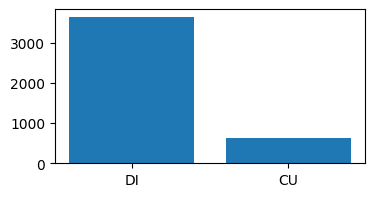

In [106]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(4,2))
ax.bar(y_plot.index,y_plot.values)

In [212]:
def extract_last_100_words(df, column_name):
         df[column_name] = df[column_name].apply(lambda x: ' '.join(str(x).split()[-100 :]) if isinstance(x, str) else x)
         return df

         # Apply the truncation function to the specified column
         df[column_name] = df[column_name].apply(truncate_text)
         return df


In [213]:
extract_last_100_words(job,"Comments")

,Suspension type,Comments
0,DI,"Job created by Love Saint Louis M.C Flawen, Cu..."
1,DI,Job created by Farquharson Javaun
2,DI,"Job created by Gray Gabrielle , Cx is offline ..."
3,DI,"Job created by USER ADMIN, due to time constra..."
4,DI,"Job created by Haynes Elika , No internet, LOS..."
...,...,...
4278,DI,"Job created by Sobers Anesia, Customer said th..."
4279,DI,Job created by Worrell Kyle
4280,DI,"Job created by USER ADMIN, .-. , Confirmed ETA..."
4281,CU,"Job created by Caton Keisha, this no. seem to ..."


In [214]:
X=job["Comments"].astype('str')
y=job["Suspension type"]

In [215]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [217]:
vectorizer =TfidfVectorizer()
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [218]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train_vec,y_train)

In [219]:
y_sm_plot=y_train_sm.value_counts()


<BarContainer object of 2 artists>

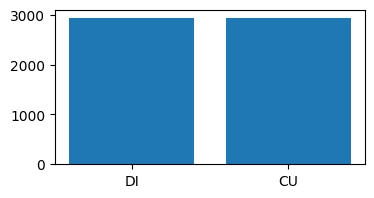

In [220]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(4,2))
ax.bar(y_sm_plot.index,y_sm_plot.values)


In [221]:
model=make_pipeline(MultinomialNB())
model.fit(X_train_sm,y_train_sm)
y_pred=model.predict(X_test_vec)

In [222]:
model.score(X_train_sm,y_train_sm)

0.9069609507640068

In [223]:
model.score(X_test_vec,y_test)

0.8366394399066511

In [224]:
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,confusion_matrix,accuracy_score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          CU       0.73      0.51      0.60       207
          DI       0.86      0.94      0.90       650

    accuracy                           0.84       857
   macro avg       0.79      0.73      0.75       857
weighted avg       0.83      0.84      0.83       857



In [225]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,  39],
       [101, 611]])

Text(8.222222222222223, 0.5, 'Predicted')

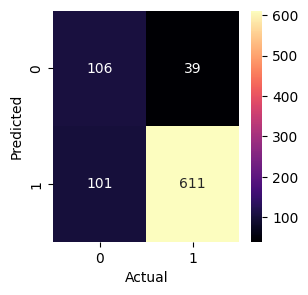

In [227]:
plt.figure(figsize=(3,3))

sns.heatmap(cm, annot=True, fmt='d', cmap='magma' )
plt.xlabel("Actual")
plt.ylabel("Predicted")


In [229]:
f1_score(y_pred,y_test, average='weighted')

np.float64(0.8259707642948279)

In [230]:
recall_score(y_pred,y_test, average='weighted')

np.float64(0.8366394399066511)

In [231]:
precision_score(y_pred,y_test, average='weighted')

np.float64(0.827443502626907)

In [232]:
accuracy_score(y_pred,y_test)

0.8366394399066511

In [233]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=10)

In [234]:
def model_score (model,X_train,X_test,y_train,y_test):
    model.fit(X_train_sm,y_train_sm)
    return model.score(X_test,y_test)

In [235]:
naive_bayes_result=[]

for train_index,test_index in skfolds.split(X,y):
    X_train,X_test,y_train,y_test = vectorizer.transform(X[train_index]),vectorizer.transform(X[test_index]),y[train_index],y[test_index]
    naive_bayes_result.append(model_score(MultinomialNB(),X_train,X_test,y_train,y_test))

In [236]:
naive_bayes_result

[0.8974358974358975,
 0.8927738927738927,
 0.8578088578088578,
 0.852803738317757,
 0.8714953271028038,
 0.883177570093458,
 0.8761682242990654,
 0.7990654205607477,
 0.8364485981308412,
 0.8014018691588785]